# SGD Classifier
## chargement des données 
On charge nos données déja nettoyées

In [2]:
import pandas as pd

cleaned_datas = pd.read_csv("datas/cleanedData.csv")
labels = pd.read_csv("datas/labels.csv")
cleaned_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EmployeeID                         4300 non-null   float64
 1   EnvironmentSatisfaction            4300 non-null   float64
 2   JobSatisfaction                    4300 non-null   float64
 3   WorkLifeBalance                    4300 non-null   float64
 4   Attrition                          4300 non-null   float64
 5   BusinessTravel                     4300 non-null   float64
 6   DistanceFromHome                   4300 non-null   float64
 7   Education                          4300 non-null   float64
 8   JobLevel                           4300 non-null   float64
 9   MonthlyIncome                      4300 non-null   float64
 10  NumCompaniesWorked                 4300 non-null   float64
 11  PercentSalaryHike                  4300 non-null   float

## Creation du jeu de test et d'entrainement

In [3]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split( cleaned_datas[["MeanWorkingHours","BusinessTravel","EducationField_Human Resources", "WorkLifeBalance", "JobSatisfaction", "EnvironmentSatisfaction", "YearsAtCompany", "YearsWithCurrManager", "TotalWorkingYears"]], labels["Attrition"], test_size=0.3, shuffle=True)

In [4]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

## Entrainement

In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

y_train_sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)


print(confusion_matrix(y_train, y_train_sgd_pred))

[[2484   31]
 [ 458   37]]


In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(f"recall : {precision_score(y_train, y_train_sgd_pred)}")
print(f"precision : {recall_score(y_train, y_train_sgd_pred)}")


f1_score(y_train, y_train_sgd_pred)

recall : 0.5441176470588235
precision : 0.07474747474747474


0.1314387211367673

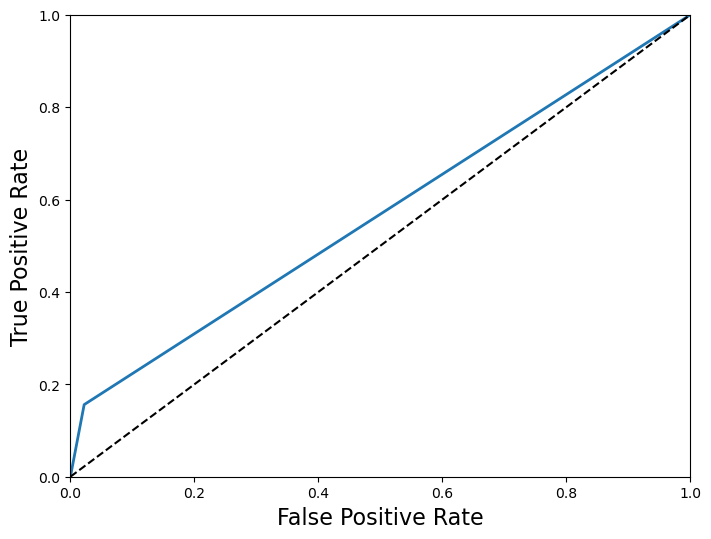

In [12]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)


fpr, tpr, thresholds = roc_curve(y_train, y_train_sgd_pred)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show()